1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [12]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import scipy.optimize as opt
import pandas as pd
from scipy import stats
from scipy.optimize import Bounds

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

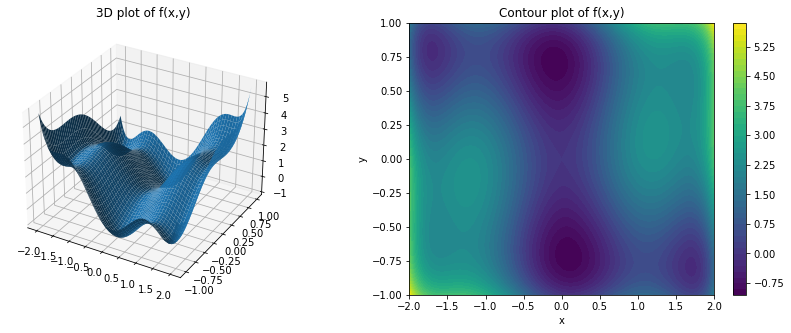

In [8]:
def Q1(x): 
    return (x[0]**2)*(4 - 2.1*x[0]**2 + (x[0]**4)/3) + x[0]*x[1] + (x[1]**2)*(4*x[1]**2 - 4)

N = 300
x = np.linspace(-2,2,N)
y = np.linspace(-1,1,N)

xx,yy = np.meshgrid(x,y)
zz = Q1(np.array([xx,yy]))

with plt.rc_context({'figure.figsize' : [15,5]}):  
    fig = plt.figure()
    ax3d = fig.add_subplot(1,2,1,projection='3d')
    axim = fig.add_subplot(1,2,2)
    ax3d.plot_surface(xx,yy,zz)
    cs=axim.contourf(xx,yy,zz,50)
    cbar = fig.colorbar(cs)
    ax3d.set_title("3D plot of f(x,y)")
    axim.set_title("Contour plot of f(x,y)")
    axim.set_xlabel('x')
    axim.set_ylabel('y')
    plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Parameters of fitting: 
	mean	sigma		offset		scale
max:
[  5.73581633   2.29443574  15.77931963 132.80945885]
min:
[  6.16452591   1.97590029 -61.3209382  260.76391872]


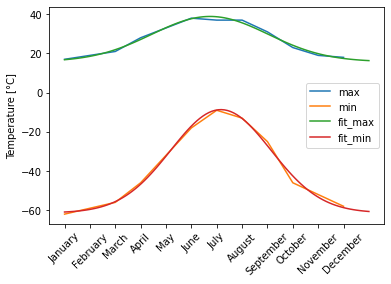

Covariance matrices
max:
[[ 6.31513585e-03 -2.12225782e-04  1.91641435e-03 -2.15104328e-02]
 [-2.12225782e-04  2.75437852e-02 -1.70932556e-01  2.17795464e+00]
 [ 1.91641435e-03 -1.70932556e-01  1.38431392e+00 -1.61250331e+01]
 [-2.15104328e-02  2.17795464e+00 -1.61250331e+01  2.03798215e+02]]
min:
[[ 2.22850086e-03 -4.92557023e-05  1.09102435e-03 -1.08267432e-02]
 [-4.92557023e-05  5.77328328e-03 -7.06521644e-02  8.74435866e-01]
 [ 1.09102435e-03 -7.06521644e-02  1.41331085e+00 -1.45310827e+01]
 [-1.08267432e-02  8.74435866e-01 -1.45310827e+01  1.78561016e+02]]

the fit is reasonable, the time offset is not the same within the fit accuracy


In [14]:
import math
from scipy import optimize, stats

t_max = np.asarray((17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18))
t_min = np.asarray((-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58))
months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
x = np.arange(0, 12, 1)
plt.plot(x, t_max, label='max')
plt.plot(x, t_min, label='min')
plt.xticks(x, months, rotation=45)
plt.ylabel('Temperature [°C]')

def Q2(x, mean, sigma, offset, k):
    return k*(sigma*(2*math.pi)**0.5)**-1*np.exp(-(x-mean)**2/(2*sigma**2)) + offset

max_popt, max_pcov = optimize.curve_fit(Q2, x, t_max, p0=(6, 4, 20, 40), bounds=([0,0,0,0], [12,12,40,200]))
min_popt, min_pcov = optimize.curve_fit(Q2, x, t_min, p0=(6, 4, -70, 60), bounds=([0,0,-100,0], [12,12,0,400]))
#redefine x to plot smoother functions
x = np.linspace(0, 12, 100)
print("Parameters of fitting: ", "\tmean\tsigma\t\toffset\t\tscale\nmax:", max_popt, 'min:', min_popt, sep='\n')

plt.plot(x, Q2(x, max_popt[0], max_popt[1], max_popt[2], max_popt[3]), label = 'fit_max')
plt.plot(x, Q2(x, min_popt[0], min_popt[1], min_popt[2], min_popt[3]), label = 'fit_min')
plt.legend()
plt.show()
print("Covariance matrices", "max:", max_pcov, "min:", min_pcov, sep='\n')
print("\nthe fit is reasonable, the time offset is not the same within the fit accuracy")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
[  8.  13.   6.   9.  13.  19.  16.  15.  18.  15.  13.  15.  17.  17.
  28.  20.  18.  25.  14.  20.  20.  21.  24.  28.  30.  28.  27.  26.
  34.  32.  44.  47.  57.  87.  77. 107. 112. 125. 190. 200. 272. 322.
 351. 409. 493. 592. 656. 693. 655. 677. 645. 510. 431. 348. 285. 249.
 153. 170. 122. 113.  98.  67.  63.  49.  41.  43.  26.  34.  24.  20.
  25.  20.  18.  16.  21.  15.   8.   7.   6.  10.   5.  10.  10.   8.
   5.   4.   6.   8.   4.   5.   4.   3.   4.   6.   3.   3.   3.   4.
   1.   1.]
[ 6.36898895e+02 -8.49878451e-02 -1.10996581e+01  2.00292511e+01]

 the R^2 is:  -19738296349789.062
the p-value is:  0.0  As we 

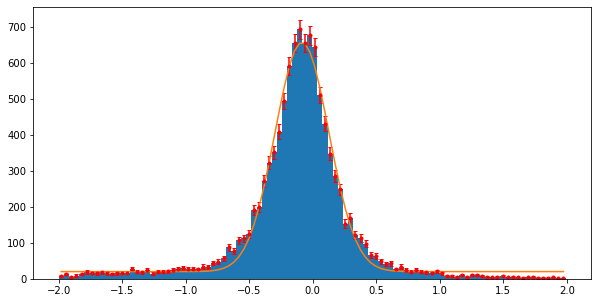

In [16]:
df=pd.DataFrame(np.load('residuals_261.pkl', allow_pickle=True).item())
print(df)
residuals=df['residuals'].values

residuals = residuals[residuals > -2]
residuals = residuals[residuals < 2]
distances = df['distances']

plt.figure(figsize=(10,5))
h, edges, _ = plt.hist(residuals, bins=100)
print(h)
midd = np.array([edges[i-1]+(edges[i]-edges[i-1])/2 for i in range(1,len(edges))])
plt.errorbar(midd, h, yerr = np.sqrt(h), fmt='r.', capsize=2)

def g(x, a, b, c, d):
    return a*np.exp(( ((x - b)**2)*c )) + d

opt3,_=sp.optimize.curve_fit(g ,midd , h, p0 = [500,0,0,0])
print(opt3)
plt.plot(midd , g(midd, *opt3))

ys=g(midd,*opt3)
ssr=np.sum(ys-h)**2
yt=np.mean(h)
tss=np.sum(yt-h)**2

R=1.-(ssr/tss)
#chi2 thest
sig=np.sqrt(np.abs(h))
chi2=np.sum(((h-ys)**2)/sig)
pvalue = 1. - stats.chi2.cdf(chi2, len(midd)-1)
print('\n the R^2 is: ',R)
print('the p-value is: ',pvalue, ' As we observe it is satisfactory. ')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

best values: a= -9.988133676165802 b= 12.333023014218867 c= 9.384114875026858
for function: max hot= 19.372217145618983 min cold= -0.6037792041845726
overal avg: 9.38409773497604
R2 = 0.6795934800804344 
R = 0.8243745993663526
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]
R2 = 0.6796593571451617 
R = 0.8244145541808209
Covariance matrix:
 [[1.         0.01341277]
 [0.01341277 1.        ]]
SSR: 34359.85859996652 34352.79405387184
Test Linear vs f:
CL: 0.584 , additional parameter necessary: NO


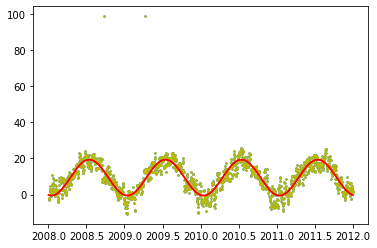

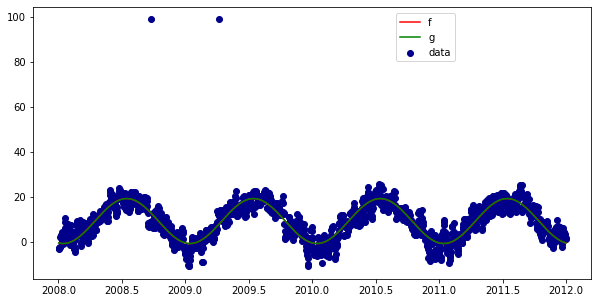

In [19]:
import numpy as np
def f(t,a,b,c):
    return a*np.cos(2*t*np.pi+b)+c

df=pd.read_csv("munich_temperatures_average_with_bad_data.txt",sep=" ",header=None)

df=df[(df[0]> 2008) & (df[0]<2012)]
import pylab as plb
import matplotlib.pyplot as plt
from scipy import optimize
plt.scatter(df[0],df[1],s=2)
x=df[0]
y=df[1]

popt, pcov = optimize.curve_fit(f, df[0], df[1])

plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],f(df[0],*popt),'r')

print('best values:','a=',popt[0],'b=',popt[1],'c=',popt[2])

dd=np.linspace(int(np.min(df[0])),int(np.max(df[0])),1000)
mn=np.min(f(dd,*popt))
mx=np.max(f(dd,*popt))
print('for function:','max hot=',mx,'min cold=',mn)

def ff(t,a,b,c,d):
    return a*np.cos(2*t*np.pi*d+b)+c

popt1, pcov1 = optimize.curve_fit(ff, df[0], df[1])

popt1
plt.scatter(df[0],df[1],color='y',alpha=0.5, s=2)
plt.plot(df[0],ff(df[0],*popt1),'r')
popt1

print('overal avg:',np.mean(df[1]))

ssr = np.sum((y-(f(x,*popt)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y)) 

ssr = np.sum((y-(ff(x,*popt1)))**2)
tss = np.sum((np.mean(y) - y)**2)
rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(x,y))

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL


fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=x, y=y, marker='o', c='darkblue', label="data")
N=len(x)
# define fitting functions
def f1(x, a0, a1):
    return a0 + a1 * x

def f2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

def f3(x, a0, a1, a2, a3):
    return a0 + a1 * x + a2 * x**2 + a3 * x**3

fs, cov = optimize.curve_fit(f, x, y)
y1 = f(x, *fs)
ax.plot(x, y1, color='r', label="f")
ssr_1 = np.sum((y1 - y)**2)
ndof_1 = 3 - 1 

fg, cov = optimize.curve_fit(ff, x, y)
y2 = ff(x, *fg)
ax.plot(x, y2, color='g', label="g")
ssr_2 = np.sum((y2 - y)**2)
ndof_2 = 4 - 1

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)


print("Test Linear vs f:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, ndof_1, ndof_2, N, verbose=True)
